## IMPORTING DEPENDENCIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import nltk

## Importing the data

In [2]:
data = pd.read_csv('train.csv')
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### Get a random tweet to understand how the tweets are

In [3]:
random_tweet = data["text"].sample()
random_tweet

2790    My first staining attempt was a disaster https...
Name: text, dtype: object

In [4]:
target_df=data['target']
target_counts = data['target'].value_counts()
target_counts

0    4342
1    3271
Name: target, dtype: int64

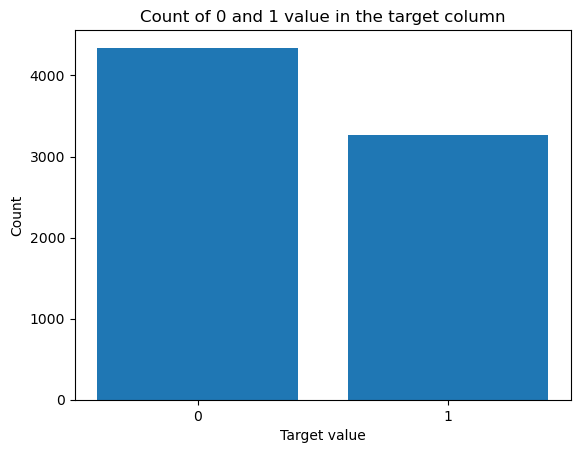

In [5]:
plt.bar(target_counts.index,target_counts.values)
plt.xlabel("Target value")
plt.xticks([0,1])
plt.ylabel("Count")
plt.title("Count of 0 and 1 value in the target column")
plt.show()

<b>0 --------->TWEET IS NOT ABOUT A REAL DISASTER <br>
    1---------->TWEET IS ABOUT A REAL DISASTER

In [6]:
data["target"].value_counts(normalize = True)

0    0.57034
1    0.42966
Name: target, dtype: float64

### Calculating the length of each tweet and creating a function for plotting a histogram

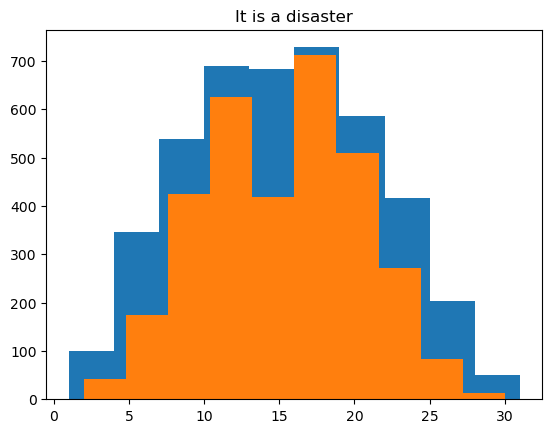

In [7]:
def length_plots(data,name):
    length = [len(sentence.split()) for sentence in data]
    plt.hist(length)
    plt.title(name)
length_plots(data[data['target']==0]["text"],"Not a disaster")
length_plots(data[data['target']==1]["text"],"It is a disaster")
#ORANGE -->IT IS A DISASTER
#BLUE -->NOT A DISASTER

In [8]:
X = data['text']
Y = data['target']
Y = np.array(Y) #CONVERTING THE DEPENDENT FEATURE TO ARRAY

# PRE-PROCESSING

### CALCULATE THE UNIQUE WORDS IN THE DATASET

In [9]:
#WORDS IN THE TWEETS
#X-->data['text']
for sent in X:
    for word in sent.split():
        print(word)
#These words may contain #,=>,numbers,',",@,-,,.. etc
#Once the unique words are found out, we have to pre-preocess these tweets

Our
Deeds
are
the
Reason
of
this
#earthquake
May
ALLAH
Forgive
us
all
Forest
fire
near
La
Ronge
Sask.
Canada
All
residents
asked
to
'shelter
in
place'
are
being
notified
by
officers.
No
other
evacuation
or
shelter
in
place
orders
are
expected
13,000
people
receive
#wildfires
evacuation
orders
in
California
Just
got
sent
this
photo
from
Ruby
#Alaska
as
smoke
from
#wildfires
pours
into
a
school
#RockyFire
Update
=>
California
Hwy.
20
closed
in
both
directions
due
to
Lake
County
fire
-
#CAfire
#wildfires
#flood
#disaster
Heavy
rain
causes
flash
flooding
of
streets
in
Manitou,
Colorado
Springs
areas
I'm
on
top
of
the
hill
and
I
can
see
a
fire
in
the
woods...
There's
an
emergency
evacuation
happening
now
in
the
building
across
the
street
I'm
afraid
that
the
tornado
is
coming
to
our
area...
Three
people
died
from
the
heat
wave
so
far
Haha
South
Tampa
is
getting
flooded
hah-
WAIT
A
SECOND
I
LIVE
IN
SOUTH
TAMPA
WHAT
AM
I
GONNA
DO
WHAT
AM
I
GONNA
DO
FVCK
#flooding
#raining
#flooding
#Florida
#T

A
better
look
at
what
this
catastrophic
rain
and
flooding
has
done
to
ourÛ_
https://t.co/5yRBegzafX
The
Catastrophic
Effects
of
Hiroshima
and
Nagasaki
Atomic
Bombings
Still
Being
Felt
Today
http://t.co/rNqEBAyCVM
Learning
from
the
Legacy
of
a
Catastrophic
Eruption
-
The
New
Yorker
http://t.co/t344PhNpy9
Something
Catastrophic
Is
Coming:
Should
We
Tune
Out?
http://t.co/a8jZ5A26wi
'Kessler
Syndrome'
is
the
name
for
the
catastrophic
exponential
proliferation
of
Space
debris
and
destruction
of
satellites.
#GravityMovie
Learning
from
the
Legacy
of
a
Catastrophic
Eruption
-
The
New
Yorker
http://t.co/vMWTOUyOHm
Excited
not
only
about
the
next
6
years
of
school
and
ensuing
student
debt
but
also
catastrophic
climate
change
in
my
lifetime
:D
??
Pretty
much
every
time
the
audio
dies
on
an
audio
stream
for
a
baseball
game
I
assume
catastrophic
nuclear
attack.
Looking
for
a
#Defendant
#Catastrophic
Injury
Solicitor
#jobs
http://t.co/Gz27aUDyHa
http://t.co/P4EKgC9sIG
@SyringeToAnger
åÇ
and
probabl

Cook
When
You're
Totally
Obliterated
http://t.co/QvS7O10bG3
@Sweet2Young
I
came
in!
Had
he
fucking
moved
his
entire
existence
would've
been
obliterated.
Drunk
Meals
101:
What
To
Cook
When
You're
Totally
Obliterated
http://t.co/m19iVWrdkk
We
destroyed
the
#Zimmerman
fan
club
on
Twitter
@rzimmermanjr
and
we
obliterated
Renewsit
reduced
her
to
a
sock
acc.
http://t.co/ybshleIE3p
@RockBottomRadFM
As
a
kid
I
remember
hearing
rules
about
30
to
90
days
wo
a
defense
and
you're
stripped.
Brock
obliterated
that
So
it
looks
like
my
@SoundCloud
profile
shall
be
no
more!
Nothing
left
to
offer!
DJ
mixes
obliterated
??
#byebyesoundcloud
God
the
@mets
are
so
cocky
right
now
and
I
love
it.
Uribe
OBLITERATED
that
ball
then
strutted
the
fuck
out
of
the
batters
box...
I
was
obliterated
last
night??
WACKOS
like
#MicheleBachman
predict
the
WORLD
will
SOON
be
OBLITERATED
by
a
burning
firey
INFERNO
but
cant
accept
#GlobalWarming!!
HELLO!!!
Drunk
Meals
101:
What
To
Cook
When
You're
Totally
Obliterated
http://t.

6
2015
(Solitude
Wildfire):
Summary:
This
lightning-caused
fire
is
being
...
http://t.co/4eSbsA8InT
#UTFire
The
Latest:
More
homes
razed
by
Northern
California
wildfire
-
LancasterOnline
http://t.co/ph7wllKRfI
#Lancaster
Reuters
Top
News:
PHOTOS:
The
Rocky
Fire
has
grown
into
California's
most
...
-
http://t.co/qwrRfDGXCc
#NewsInTweets
http://t.co/sstj2bEpqn
This
machine
really
captured
my
attention.
#helicopter
#firefighting
#wildfire
#oregon
#easternoregonÛ_
https://t.co/V6qxnFHRxF
@_wildfire__
????
Bruh
that's
the
lady
from
Mulan!!
For
those
impacted
by
the
#CalWildfires
here
are
some
great
recovery
tips
to
help
you
in
the
aftermath
http://t.co/wwxbGuBww5
#IDFire
Cherokee
Road
and
Road
22
(Three
Sisters
Wildfire):
There
are
two
roads
closed
to
the
general
public:
...
http://t.co/UORXfF0NfX
Oregon's
biggest
wildfire
slows
growth
http://t.co/P0GoS5URXG
via
@katunews
Media
Release
-
Firefighters
Ask
Hikers
to
Sign-in
at
Local
Trailheads
(Parker
Ridge
Wildfire):
Parker...
http://t.co/A

In [10]:
def unique_words(sentence):
    unique_words_list  = []
    for sent in sentence:
        for word in sent.split():
            if word.lower() not in unique_words_list:
                unique_words_list.append(word.lower())
            else:
                pass
    return unique_words_list
unique_words = unique_words(X)
print("Total number of unique words present in the data: ",len(unique_words))

Total number of unique words present in the data:  27983


In [11]:
#FINDING WORDS THAT START WITH @ SYMBOL
SYMBOL = "@"
sym_words = [word for word in unique_words if word.startswith(SYMBOL)]
sym_words[:100]

['@bbcmtd',
 '@phdsquares',
 '@southridgelife',
 '@\x89û_',
 '@navista7',
 '@news24680',
 '@nxwestmidlands',
 '@ablaze',
 '@sleepjunkies:',
 '@your4state.',
 '@flowri',
 '@aftershock_delo',
 '@djicemoon',
 '@kjfordays',
 '@esquireattire',
 '@onfireanders',
 '@cod8sandscrims',
 '@empirikgaming',
 '@codawscrims',
 '@4tp_kotc',
 '@4tpfa',
 '@aftershock_org',
 '@crobscarla',
 '@alexalltimelow',
 '@youtube',
 '@mickinyman',
 '@theatlantic',
 '@20skyhawkmm20',
 '@traplord_29',
 '@fredosantana300',
 '@lilreese300',
 '@tanslash',
 '@fouseytube',
 '@thenissonian',
 '@rejectdcartoons',
 '@kiwi_karyn',
 '@medic914',
 '@aace_org',
 '@marksmaponyane',
 '@volfan326',
 '@tneazzy',
 '@acarewornheart',
 '@viralspell',
 '@amirkingkhan',
 '@floydmayweather',
 '@violentfeminazi',
 '@philipduncan',
 '@breakfastone',
 '@stormbeard',
 '@steel_lord',
 '@tomcatarts',
 '@sirbrandonknt',
 '@thatdes',
 '@rvfriedmann',
 '@lodisilverado',
 '@ritzy_jewels',
 '@potus',
 '@change',
 '@kimkardashian',
 '@theellenshow',

In [12]:
#FINDING WORDS THAT START WITH # SYMBOL
SYMBOL_1 = "#"
sym_words = [word for word in unique_words if word.startswith(SYMBOL_1)]
sym_words[:100]

['#earthquake',
 '#wildfires',
 '#alaska',
 '#rockyfire',
 '#cafire',
 '#flood',
 '#disaster',
 '#flooding',
 '#raining',
 '#florida',
 '#tampabay',
 '#tampa',
 '#we',
 '#breaking',
 '#metal',
 '#rt',
 '#africanbaze:',
 '#mufc',
 '#bridgetown',
 '#nsfw',
 '#kurds',
 '#diyala',
 '#california',
 '#climate',
 '#energy',
 '#nowplaying:',
 '#edm',
 '#nashvilletraffic.',
 '#santaclara',
 '#bayarea',
 '#traffic',
 '#personalinjury',
 '#solicitor',
 '#otleyhour',
 '#stlouis',
 '#caraccidentlawyer',
 '#truckcrash',
 '#fortworth',
 '#ashville',
 '#manchester',
 '#breaking:',
 '#hagerstown',
 '#whag',
 '#bahrain',
 '#dubstep',
 '#trapmusic',
 '#dnb',
 '#dance',
 '#ices\x89û_',
 '#growingupspoiled',
 '#wisdomwed',
 '#lifehacks',
 '#silverwood',
 '#aftershock',
 '##book',
 '#now',
 '#wdyouth',
 '#biblestudy',
 '#news',
 '#horrible',
 '#accident',
 '#watchthevideo',
 '#kca',
 '#votejkt48id',
 '#rip',
 '#binladen',
 '#mlb',
 '#man',
 '#airport',
 '#airplane',
 '#aircraft',
 '#aeroplane',
 '#runway',


### INFERENCE<br>
WE CAN SEE THAT THE HASHTAG PROVIDE SOME INFORMATION OR KEYWORDS RELATED TO THE TWEET WHILE "@" ONLY TAGS A PERSON AND THE INFORMATION IS JUST IRRELEVANT. IT ALSO DOESN'T HAVE ANY EFFECT ON THE ACCURACY OF THE MODEL

## USING REGULAR EXPRESSION TO SEARCH PATTERNS IN THE TWEET

In [13]:
import re
test_tweet = data["text"].sample()
pattern = re.compile(r"http")
matches = pattern.findall(str(test_tweet))

for match in matches:
    print(match)

### Removing URLs from the tweet

In [14]:
def url_remover(text):
    url_patterns = re.compile(r'https?://S+|www.S+')
    return url_patterns.sub(r'', text)

In [15]:
!pip install tqdm

In [16]:
from tqdm import tqdm
import nltk
nltk.download('omw-1.4')
from nltk.corpus import stopwords

[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [17]:
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()
def preprocessing(text):
  pre_tweet = []
  for sentence in tqdm(text):
    sentence = sentence.lower() # converting the words to lower case
    sentence =  url_remover(sentence) # removing the url from the sentence
    sentence = re.sub(r'@w+',  '', sentence).strip() # removing the words starts with "@"
    sentence = re.sub("[^a-zA-Z0-9 ']", "", sentence) # removing symbols
    sentence = sentence.split()
    sentence1 = [wl.lemmatize(word) for word in sentence if word not in set(stopwords.words("english"))] #lemmatization and stopwrds removal from tweets
    sentence1 = " ".join(sentence1)
    pre_tweet.append(sentence1)
  return pre_tweet
tweets = preprocessing(X)

100%|█████████████████████████████████████████████████████████████████████████████| 7613/7613 [01:12<00:00, 105.37it/s]


<b> We didn't use Tokenizer as we used a loop to remove each and every word that has #,url and stopwords.

In [18]:
from tensorflow.keras.layers import (Embedding,
                                     LSTM,
                                     Dense,
                                     Dropout,
                                     GlobalMaxPool1D,
                                     BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

#EMBEDDING -->Represents words as vectors and also helps in understanding the semantic context of the text
#LSTM --> (Long Short-Term Memory) LSTM is a type of RNN
#Dropout (Check notes) --> Regularization technique to prevent overfitting
#GlobalMaxPool1d --> Pooling layer that takes max value from the spatial dimension
#BatchNormalization --> Normalizing the input in each layer to stabilize the learning process


<b> PERFORMING ONE-HOT ENCODING ON THE TWEETS
    

In [19]:
VOC_SIZE = 30000
one_hot_vector = [one_hot(words,VOC_SIZE)for words in tweets]
one_hot_vector[110:120]

[[4494, 7837, 14650, 13787, 17583, 18172, 9275],
 [20561, 27476, 23012, 5207, 10353, 3792, 25672],
 [3792, 23602, 13770, 28182, 28747, 25051, 6470, 23159, 25051],
 [3792, 27538],
 [7924,
  23189,
  24791,
  3792,
  29880,
  1499,
  15010,
  16329,
  17093,
  2778,
  15235,
  23376,
  16613],
 [7924,
  23189,
  24791,
  3792,
  6184,
  1499,
  15010,
  16329,
  17093,
  2778,
  15235,
  23376,
  25929],
 [7924,
  23189,
  24791,
  3792,
  15693,
  1499,
  15010,
  16329,
  17093,
  2778,
  15235,
  23376,
  2074],
 [12836, 16553, 18132, 5364, 3792],
 [7924,
  23189,
  24791,
  3792,
  5871,
  1499,
  15010,
  16329,
  17093,
  2778,
  15235,
  23376,
  8221],
 [7924,
  23189,
  24791,
  3792,
  5871,
  1499,
  15010,
  16329,
  17093,
  2778,
  15235,
  23376,
  8221]]

In [20]:
word_length = []
for a in one_hot_vector:
    word_length.append(len(a))
len(word_length)

7613

In [21]:
max(word_length)

25

<b>The length of each word in a sentence varies. This may cause a problem as, when the sentences are fed to the neural network without padding, the network would not be able to process it. So we use padding to stabilize the issue.

In [22]:
sentence_length = 15
embedded_docs = pad_sequences(one_hot_vector,padding = "post",maxlen = sentence_length)
embedded_docs

array([[ 2374, 19898, 17844, ...,     0,     0,     0],
       [26778, 10336,  9944, ...,     0,     0,     0],
       [21017, 12683, 13701, ...,     0,     0,     0],
       ...,
       [ 2388,  9170,  9496, ...,     0,     0,     0],
       [11403,   902, 29577, ...,  6851,   691,     0],
       [16954, 18679, 29077, ...,     0,     0,     0]])

### BUILDING AN LSTM MODEL

In [23]:
def model():
  VECTOR_FEATURES = 32
  lstm_model = Sequential()
  lstm_model.add(Embedding(VOC_SIZE,
                      VECTOR_FEATURES,
                      input_length=sentence_length))
  lstm_model.add(LSTM(100, return_sequences = True))
  lstm_model.add(GlobalMaxPool1D())
  lstm_model.add(BatchNormalization())
  lstm_model.add(Dropout(0.5))
  lstm_model.add(Dense(10, activation="relu"))
  lstm_model.add(Dropout(0.25))
  lstm_model.add(Dense(1, activation = "sigmoid"))
  return lstm_model
lstm_model = model()
lstm_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
lstm_model.summary() #summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 32)            960000    
                                                                 
 lstm (LSTM)                 (None, 15, 100)           53200     
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 10)                1

In [26]:
acc_loss = lstm_model.fit(embedded_docs,Y,epochs = 8,batch_size = 32)

Epoch 1/8
238/238 [==============================] - 9s 40ms/step - loss: 0.0605 - accuracy: 0.9806
Epoch 2/8
238/238 [==============================] - 9s 38ms/step - loss: 0.0581 - accuracy: 0.9820
Epoch 3/8
238/238 [==============================] - 9s 37ms/step - loss: 0.0457 - accuracy: 0.9848
Epoch 4/8
238/238 [==============================] - 9s 37ms/step - loss: 0.0404 - accuracy: 0.9869
Epoch 5/8
238/238 [==============================] - 8s 35ms/step - loss: 0.0479 - accuracy: 0.9861
Epoch 6/8
238/238 [==============================] - 8s 35ms/step - loss: 0.0412 - accuracy: 0.9856
Epoch 7/8
238/238 [==============================] - 8s 36ms/step - loss: 0.0339 - accuracy: 0.9887
Epoch 8/8
238/238 [==============================] - 9s 36ms/step - loss: 0.0358 - accuracy: 0.9883


### Graph to represent the increase in accuracy as the number of epochs increase


Text(0, 0.5, 'Accuracy')

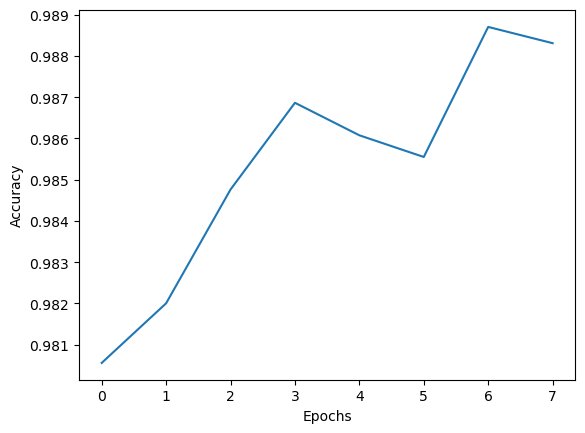

In [27]:
plt.plot(acc_loss.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

### Graph to represent the decrease in loss as the number of epochs increase

Text(0, 0.5, 'Loss')

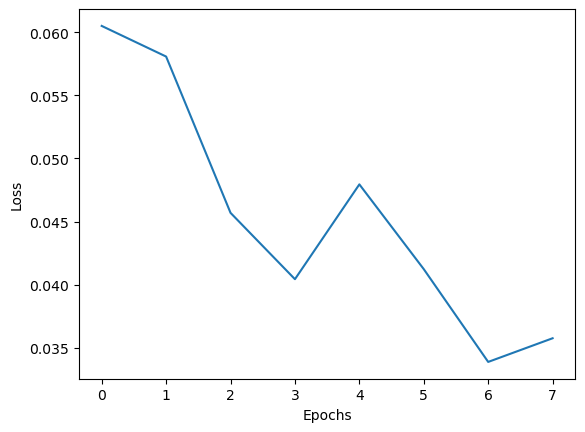

In [28]:
plt.plot(acc_loss.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")